# CLASSIFYING NEWSWIRES: A MULTICLASS CLASSIFICATION EXAMPLE

## Loading the Reuters dataset

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
train_labels[10]

3

## Preparing the data

In [8]:
# Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized test data

In [14]:
# One-hot encoding applied to the labels
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
len(x_train[0])

10000

In [10]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

## Building the Network

In [11]:
# Model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validating the approach

In [15]:
# Separating data into training and validation sets
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 305us/step - loss: 2.5295 - acc: 0.4950 - val_loss: 1.7200 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 282us/step - loss: 1.4454 - acc: 0.6883 - val_loss: 1.3476 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 2s 299us/step - loss: 1.0954 - acc: 0.7643 - val_loss: 1.1716 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 280us/step - loss: 0.8697 - acc: 0.8162 - val_loss: 1.0836 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 2s 251us/step - loss: 0.7037 - acc: 0.8479 - val_loss: 0.9846 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 2s 295us/step - loss: 0.5678 - acc: 0.8796 - val_loss: 0.9399 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 2s 286us/step - loss: 0.4612 - acc: 0.9038 - val_loss: 0.9078 - val_acc: 0.8030


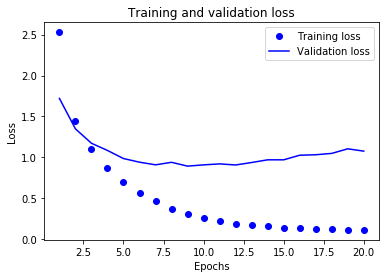

In [17]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

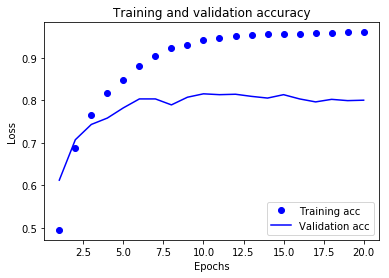

In [19]:
# Plotting the training and validation accuracy
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 293us/step - loss: 2.5414 - acc: 0.5229 - val_loss: 1.6816 - val_acc: 0.6520
Epoch 2/9
7982/7982 [==============================] - 2s 262us/step - loss: 1.3797 - acc: 0.7095 - val_loss: 1.2832 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 2s 287us/step - loss: 1.0221 - acc: 0.7772 - val_loss: 1.1339 - val_acc: 0.7500
Epoch 4/9
7982/7982 [==============================] - 2s 286us/step - loss: 0.8040 - acc: 0.8239 - val_loss: 1.0546 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 2s 260us/step - loss: 0.6434 - acc: 0.8622 - val_loss: 0.9783 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 2s 264us/step - loss: 0.5147 - acc: 0.8931 - val_loss: 0.9118 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 2s 265us/step - loss: 0.4144 - acc: 0.9146 - val_loss: 0.8964 - val_acc: 0.8250
Epoch 8

In [21]:
results

[1.023383226972123, 0.7791629564199507]

In [22]:
# Random baseline
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

## Generating predictions for new data

In [23]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

1.0000001

In [26]:
np.argmax(predictions[0])

3

## A different way to handle the labels and loss

In [27]:
# Encode the labels casting them as an integer tensor
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [28]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy', # Chaning the loss function
              metrics=['acc'])

In [30]:
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
8982/8982 [==============================] - 2s 268us/step - loss: 0.3326 - acc: 0.9299
Epoch 2/9
8982/8982 [==============================] - 2s 269us/step - loss: 0.2429 - acc: 0.9400
Epoch 3/9
8982/8982 [==============================] - 2s 258us/step - loss: 0.2105 - acc: 0.9475
Epoch 4/9
8982/8982 [==============================] - 2s 278us/step - loss: 0.1849 - acc: 0.9492
Epoch 5/9
8982/8982 [==============================] - 2s 265us/step - loss: 0.1693 - acc: 0.9498
Epoch 6/9
8982/8982 [==============================] - 2s 264us/step - loss: 0.1546 - acc: 0.9536
Epoch 7/9
8982/8982 [==============================] - 3s 286us/step - loss: 0.1439 - acc: 0.9535
Epoch 8/9
8982/8982 [==============================] - 2s 269us/step - loss: 0.1346 - acc: 0.9554
Epoch 9/9
2246/2246 [==============================] - 1s 518us/step


In [31]:
results

[1.188918552543049, 0.78539626001780949]

## The importance of having sufficiently large intermediate layers

In [32]:
# A model with an information bottleneck -> 8% drop of val_acc
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu')) # 4 hidden units
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 572us/step - loss: 3.1600 - acc: 0.0836 - val_loss: 2.5152 - val_acc: 0.3370
Epoch 2/20
7982/7982 [==============================] - 4s 502us/step - loss: 1.8887 - acc: 0.5786 - val_loss: 1.6086 - val_acc: 0.5770
Epoch 3/20
7982/7982 [==============================] - 4s 535us/step - loss: 1.3707 - acc: 0.6110 - val_loss: 1.4351 - val_acc: 0.6060
Epoch 4/20
7982/7982 [==============================] - 4s 499us/step - loss: 1.1560 - acc: 0.6963 - val_loss: 1.3273 - val_acc: 0.6840
Epoch 5/20
7982/7982 [==============================] - 4s 515us/step - loss: 1.0101 - acc: 0.7509 - val_loss: 1.2913 - val_acc: 0.7010
Epoch 6/20
7982/7982 [==============================] - 4s 513us/step - loss: 0.9090 - acc: 0.7670 - val_loss: 1.2661 - val_acc: 0.7070
Epoch 7/20
7982/7982 [==============================] - 4s 525us/step - loss: 0.8283 - acc: 0.7771 - val_loss: 1.2756 - val_acc: 0.7060


## Further experiment

In [34]:
# A model with three hidden layers each of them with 128 hidden unit and increasing batch size
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=1024,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 265us/step - loss: 2.8127 - acc: 0.4015 - val_loss: 1.7665 - val_acc: 0.5760
Epoch 2/20
7982/7982 [==============================] - 2s 240us/step - loss: 1.5201 - acc: 0.6513 - val_loss: 1.3710 - val_acc: 0.6720
Epoch 3/20
7982/7982 [==============================] - 2s 258us/step - loss: 1.1386 - acc: 0.7291 - val_loss: 1.2177 - val_acc: 0.7400
Epoch 4/20
7982/7982 [==============================] - 2s 239us/step - loss: 0.8843 - acc: 0.8039 - val_loss: 1.1004 - val_acc: 0.7740
Epoch 5/20
7982/7982 [==============================] - 2s 246us/step - loss: 0.7472 - acc: 0.8340 - val_loss: 1.0250 - val_acc: 0.7790
Epoch 6/20
7982/7982 [==============================] - 2s 234us/step - loss: 0.5901 - acc: 0.8708 - val_loss: 1.0648 - val_acc: 0.7720
Epoch 7/20
7982/7982 [==============================] - 2s 223us/step - loss: 0.4597 - acc: 0.8985 - val_loss: 1.0289 - val_acc: 0.7800
